In [133]:
from logging import critical

import numpy as np
import matplotlib.pyplot as plt
import scipy

In [134]:

#read in the file with the data
measurement_01_data = np.loadtxt('data/Measurement 1_1046', skiprows= 7 )
measurement_02_data = np.loadtxt('data/Measurement 2_1121', skiprows=7)
measurement_03_data = np.loadtxt('data/Measurement 3_1205', skiprows = 7)
measurement_04_data = np.loadtxt('data/Measurement 4_1225_B-field 15A', skiprows = 7)
measurement_05_data = np.loadtxt('data/Measurement 5_1300_B-field 15A', skiprows = 7)

measurement_06_data = np.loadtxt('data/Measurement 6_1349_Over night_right', skiprows = 7)

In [135]:
#flip the V- data and add a shift of 0.00001 V
'''all_data = [measurement_01_data, measurement_02_data, measurement_03_data, measurement_04_data, measurement_05_data,
             measurement_06_data]

for data in all_data :
    data[:,4] = -data[:,4] + 0.0001
    #shift the V+ data by 0.00008 V down
    data[:,2] = data[:,2] - 0.00008'''
    


'all_data = [measurement_01_data, measurement_02_data, measurement_03_data, measurement_04_data, measurement_05_data,\n             measurement_06_data]\n\nfor data in all_data :\n    data[:,4] = -data[:,4] + 0.0001\n    #shift the V+ data by 0.00008 V down\n    data[:,2] = data[:,2] - 0.00008'

Tbefore, I+, V+, I-, V-, Tafter, Tbase,Time


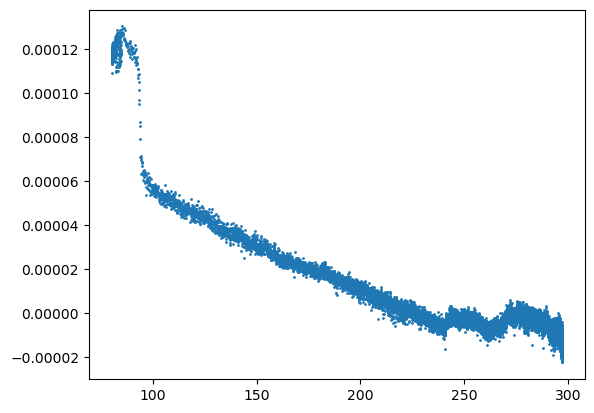

In [137]:
plt.scatter(measurement_06_data[:,5], measurement_06_data[:,4], s =1)

# Auswertungsidee

## Mache zuerst alle Auswertungen für das erste Datenset

1. Show heatin and cooling curve
2. show the averaged voltage against the temperature distinguish between heating and cooling with colours
3. 

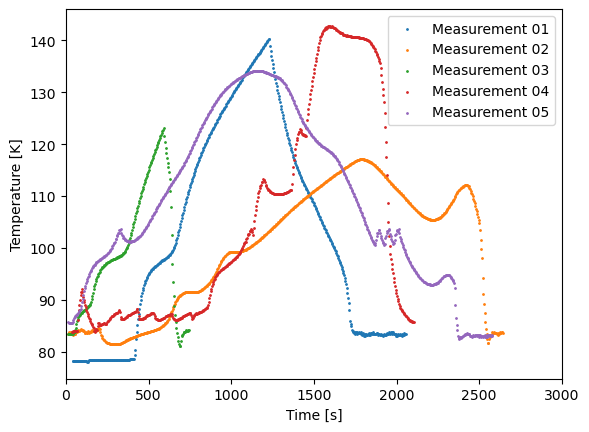

In [138]:
# 1. Show heating and cooling curve
#temperature_uncertainty_01 =  np.abs(measurement_01_data[:,5] - measurement_01_data[:,0])

measurement_01_data_average_temperature = (measurement_01_data[:,0] + measurement_01_data[:,5]) / 2
measurement_02_data_average_temperature = (measurement_02_data[:,0] + measurement_02_data[:,5]) / 2
measurement_03_data_average_temperature = (measurement_03_data[:,0] + measurement_03_data[:,5]) / 2
measurement_04_data_average_temperature = (measurement_04_data[:,0] + measurement_04_data[:,5]) / 2
measurement_05_data_average_temperature = (measurement_05_data[:,0] + measurement_05_data[:,5]) / 2
measurement_06_data_average_temperature = (measurement_06_data[:,0] + measurement_06_data[:,5]) / 2


plt.scatter(measurement_01_data[:,7],measurement_01_data_average_temperature, s = 1)
plt.scatter(measurement_02_data[:,7],measurement_02_data_average_temperature, s = 1)
plt.scatter(measurement_03_data[:,7],measurement_03_data_average_temperature, s = 1)
plt.scatter(measurement_04_data[:,7],measurement_04_data_average_temperature, s = 1)
plt.scatter(measurement_05_data[:,7],measurement_05_data_average_temperature, s = 1)

#add error bars to the plot
plt.errorbar(measurement_01_data[:,7],measurement_01_data_average_temperature, fmt = 'none')



plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.xlim(0, 3000)
plt.legend(['Measurement 01', 'Measurement 02', 'Measurement 03', 'Measurement 04', 'Measurement 05'], loc = 'upper '
                                                                                                          'right')
plt.savefig('heating_cooling_curve_01_05.png')
plt.show()




## Discussion
The heatin and cooling curves are pretty inconsistent due to some handling problems with the measurement device 
setting and restting the goal temperature was not very helpfull to get a consistent curve.

It should not matter that much for the further analysis, since the volatage is only dependent on the temperature and 
not on the time.$

## Error bars not plotted because versy small would oly make it unreadable



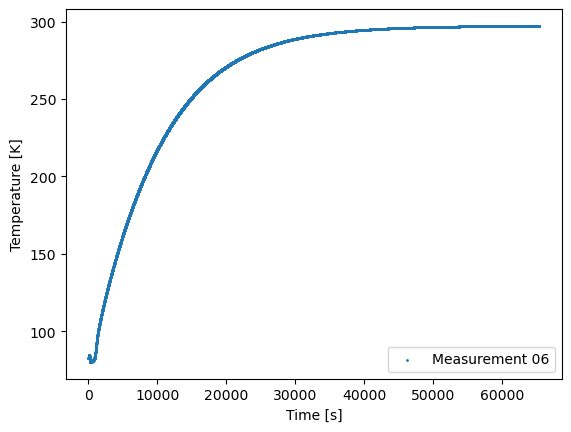

In [139]:
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.scatter(measurement_06_data[:,7],measurement_06_data_average_temperature, s = 1)
plt.savefig('heating_cooling_curve_06.png')
plt.legend(['Measurement 06'], loc = 'lower right')
plt.show()

## Discussion
The measurement number 6 was interrupted and the goal temperature was reset. This is why the curve is complete the 
other one ran over night and is a complete curve.

# Analysis of the raw data to see if the data is usable
- split the data into heating and cooling
- show the voltages against time
- show the voltages of V+ and V- against the temperature
- for all 6 different measurements
- 

In [140]:
#split the data into heating and cooling
#index of the maximal temperature
max_temperature_index_01 = np.argmax(measurement_01_data_average_temperature)
max_temperature_index_02 = np.argmax(measurement_02_data_average_temperature)
max_temperature_index_03 = np.argmax(measurement_03_data_average_temperature)
max_temperature_index_04 = np.argmax(measurement_04_data_average_temperature)
max_temperature_index_05 = np.argmax(measurement_05_data_average_temperature)
max_temperature_index_06 = np.argmax(measurement_06_data_average_temperature)

heating_data_01 = measurement_01_data[:max_temperature_index_01]
cooling_data_01 = measurement_01_data[max_temperature_index_01:]

heating_data_02 = measurement_02_data[:max_temperature_index_02]
cooling_data_02 = measurement_02_data[max_temperature_index_02:]

heating_data_03 = measurement_03_data[:max_temperature_index_03]
cooling_data_03 = measurement_03_data[max_temperature_index_03:]

heating_data_04 = measurement_04_data[:max_temperature_index_04]
cooling_data_04 = measurement_04_data[max_temperature_index_04:]

heating_data_05 = measurement_05_data[:max_temperature_index_05]
cooling_data_05 = measurement_05_data[max_temperature_index_05:]

heating_data_06 = measurement_06_data


# Analysis of V+ against time

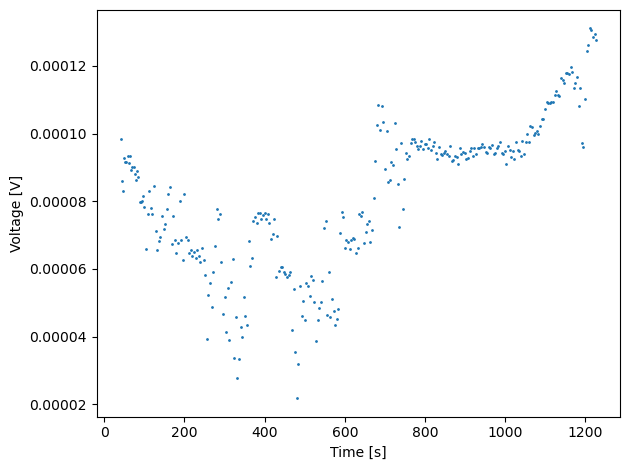

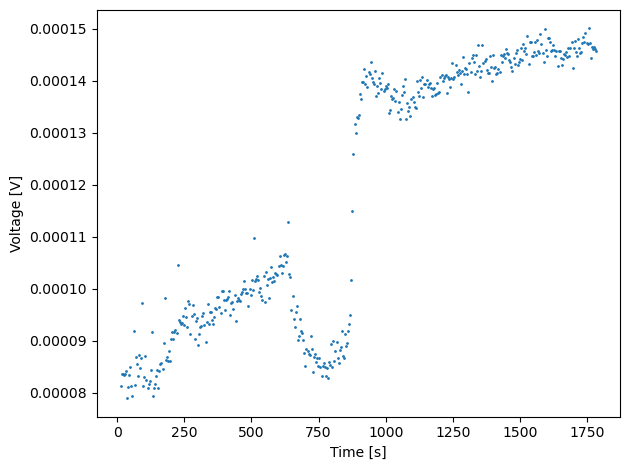

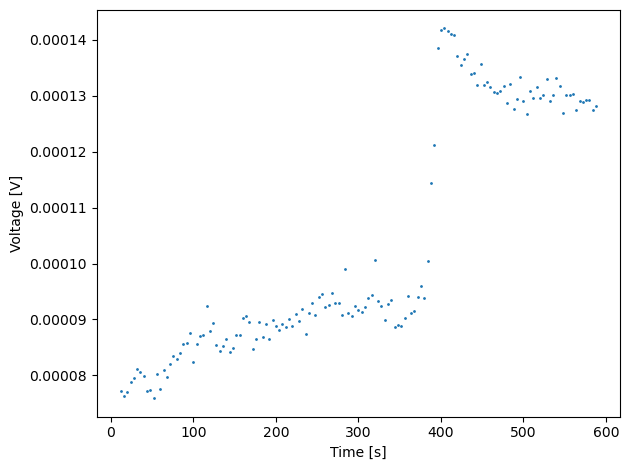

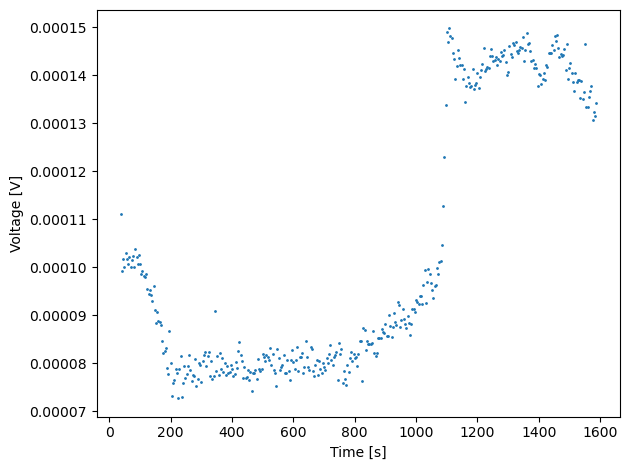

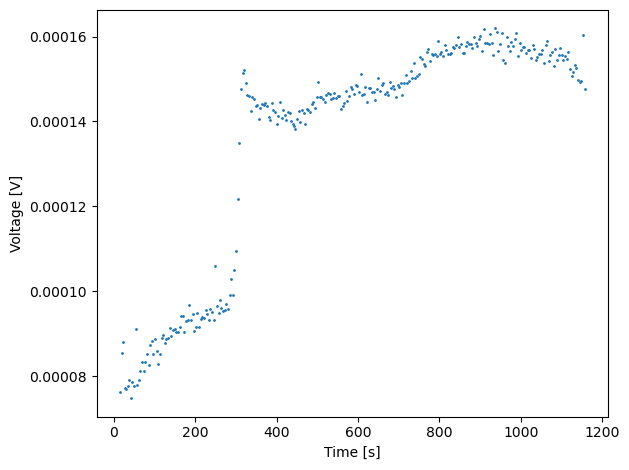

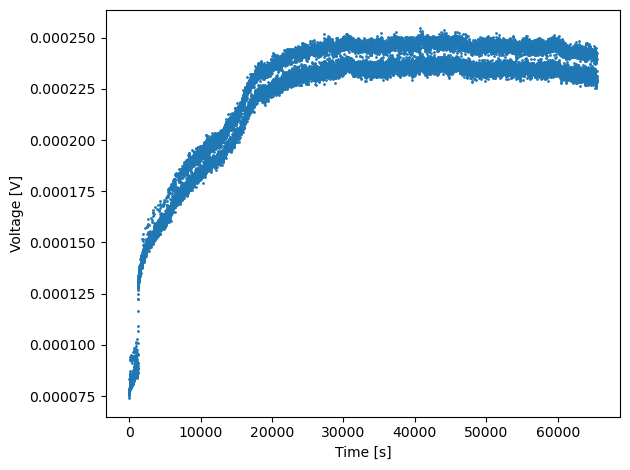

In [141]:
#plot the voltage V+ against the time for the heating and cooling data only for heating
titles = ['heating_time_vs_voltage_01_Vplus.png', 'heating_time_vs_voltage_02_Vplus.png', 'heating_time_vs_voltage_03_Vplus.png',
          'heating_time_vs_voltage_04_Vplus.png', 'heating_time_vs_voltage_05_Vplus.png', 'heating_time_vs_voltage_06_Vplus.png']
titles = titles[::-1]
for data in [heating_data_01, heating_data_02, heating_data_03, heating_data_04, heating_data_05, heating_data_06] :
    plt.scatter(data[:,7], data[:,2], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    plt.tight_layout()
    plt.savefig(titles.pop())
    plt.show()




# plot the voltage V- against the time for heating


78.183 140.234


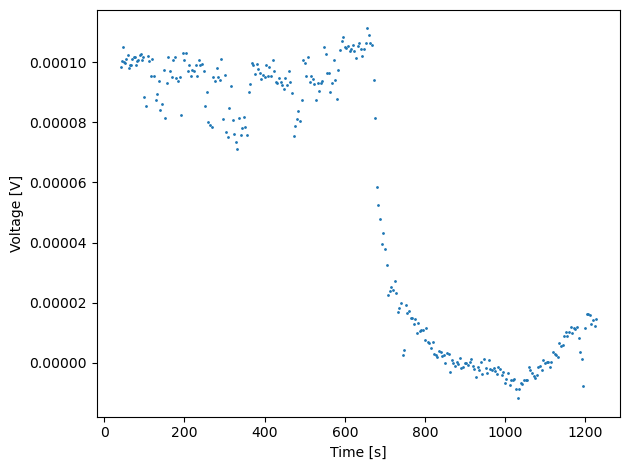

83.484 117.088


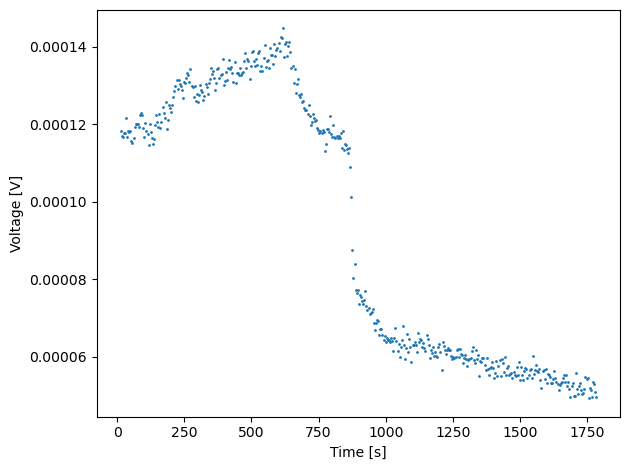

83.528 122.835


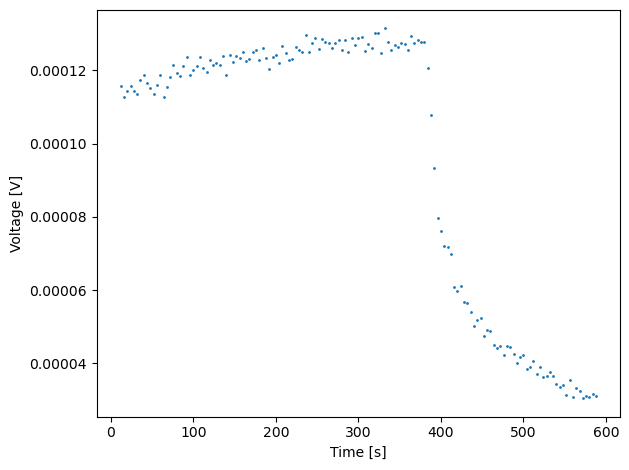

83.87 142.527


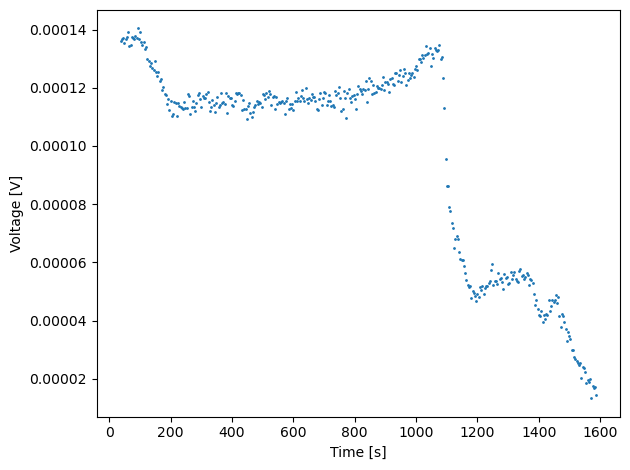

85.688 134.172


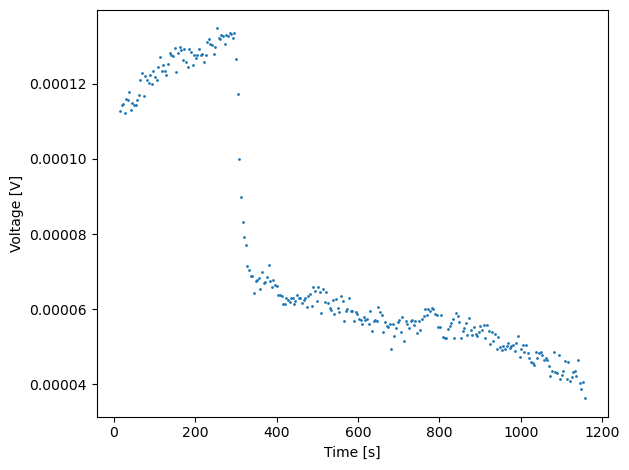

82.602 297.158


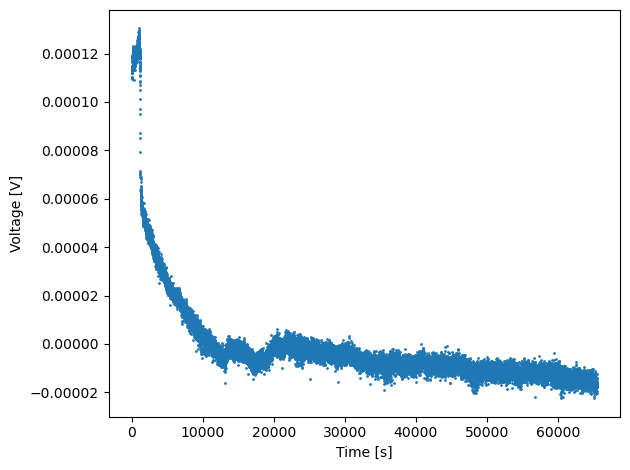

In [142]:
#plot the voltage V- against the time for the heating and cooling data only for heating
titles = ['heating_time_vs_voltage_01_Vminus.png', 'heating_time_vs_voltage_02_Vminus.png', 
          'heating_time_vs_voltage_03_Vminus.png', 'heating_time_vs_voltage_04_Vminus.png', 'heating_time_vs_voltage_05_Vminus.png', 'heating_time_vs_voltage_06_Vminus.png']
titles = titles[::-1]
for data in [heating_data_01, heating_data_02, heating_data_03, heating_data_04, heating_data_05, heating_data_06] :
    #print the value of the temperature first and last
    print(data[0,5], data[-1,5])
    plt.scatter(data[:,7], data[:,4], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    
    plt.tight_layout()
    plt.savefig(titles.pop())
    plt.show()
    

## Discussion for the heating data 
# V+
- the first times heating does not make sense because the curve is very noisy, probably some problem there
- all the other curves look pretty good and can be used for further analysis
# V-
- all the plots are shifted by approximatly 0.0001 V to the top 
- all five measuurements look feasible

# Analysis of the cooling data
## V+

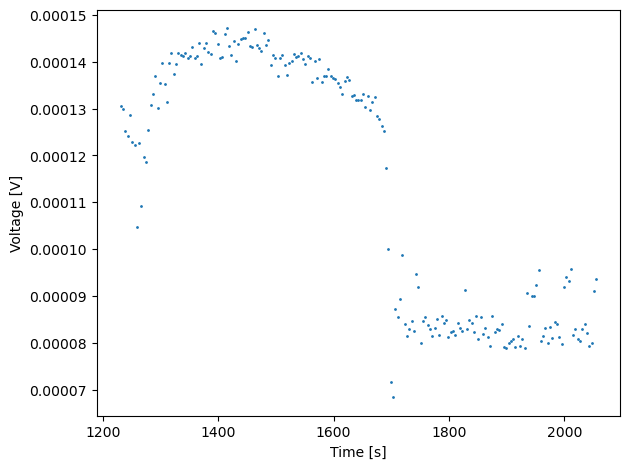

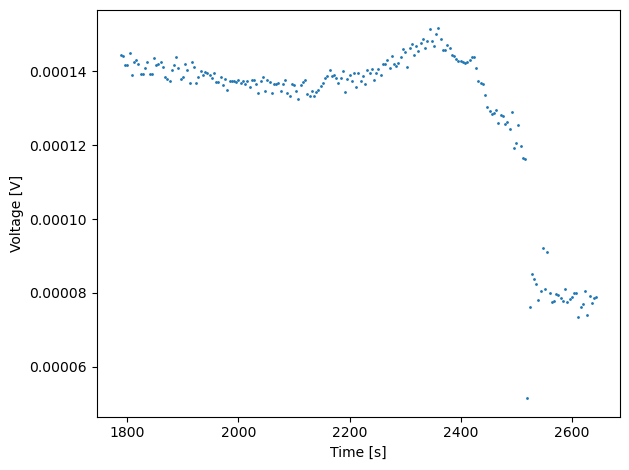

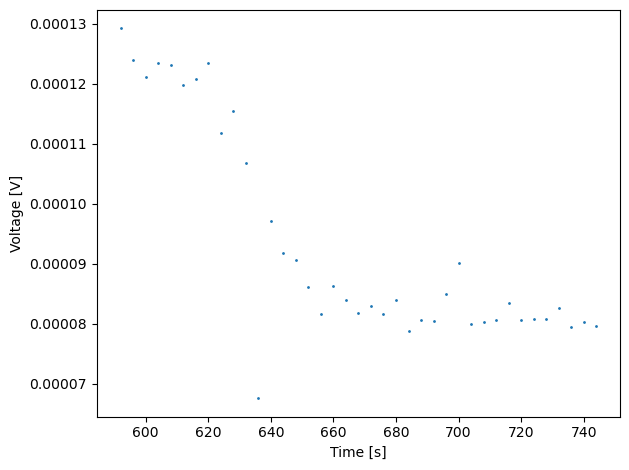

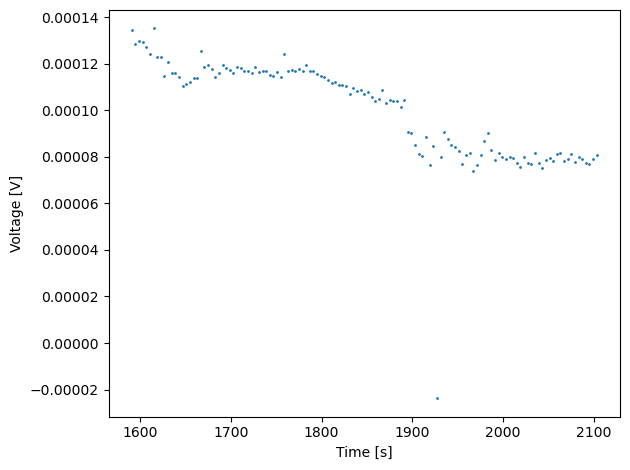

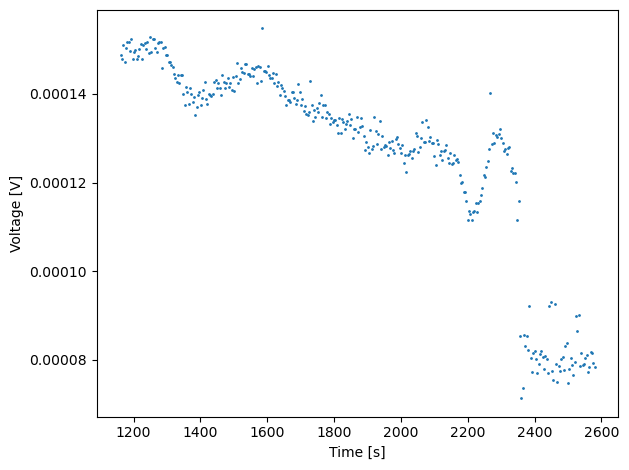

In [143]:
#plot the voltage V+ against the time for cooling
titles = ['cooling_time_vs_voltage_01_Vplus.png', 'cooling_time_vs_voltage_02_Vplus.png', 'cooling_time_vs_voltage_03_Vplus.png',
            'cooling_time_vs_voltage_04_Vplus.png', 'cooling_time_vs_voltage_05_Vplus.png']
titles = titles[::-1]

for data in [cooling_data_01, cooling_data_02, cooling_data_03, cooling_data_04, cooling_data_05] :
    plt.scatter(data[:,7], data[:,2], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.tight_layout()
    plt.savefig(titles.pop())
   
    plt.show()

# V- against the time for cooling

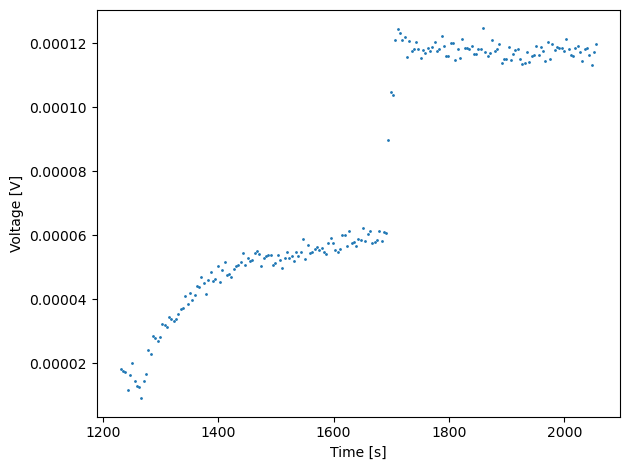

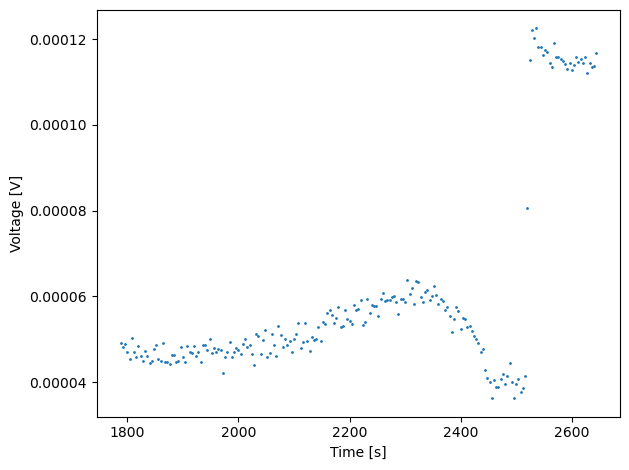

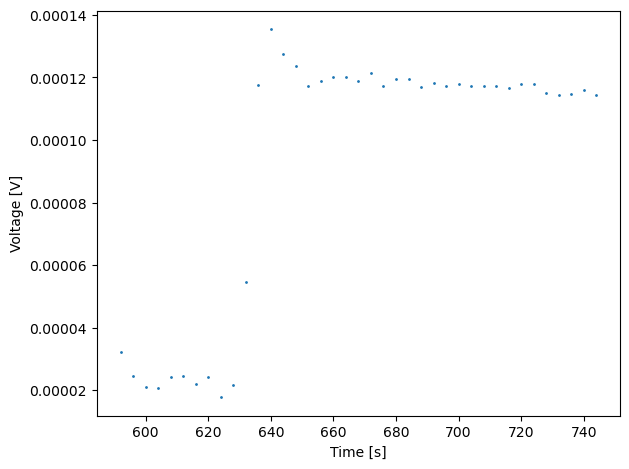

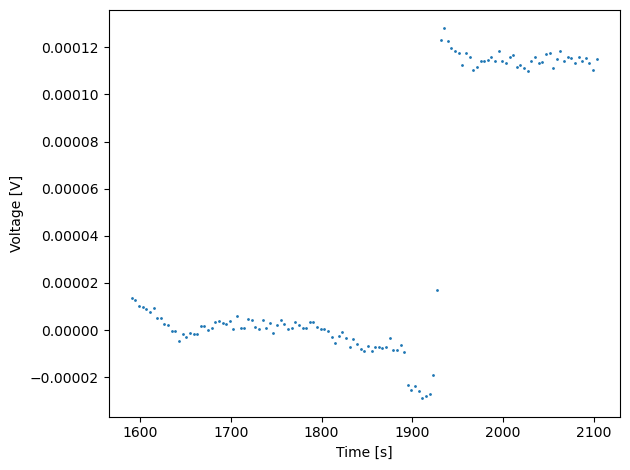

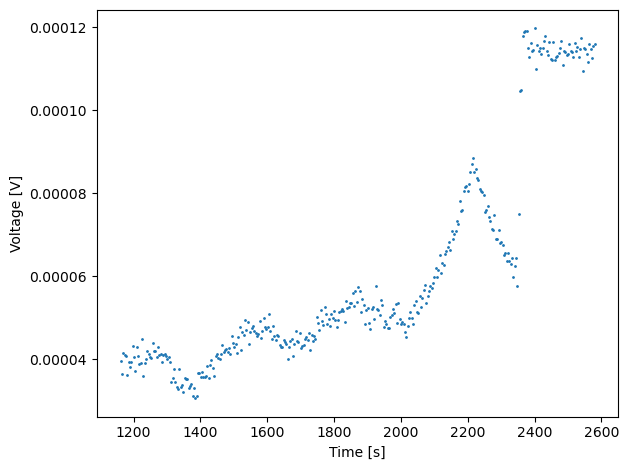

In [144]:
titles = ['cooling_time_vs_voltage_01_Vminus.png', 'cooling_time_vs_voltage_02_Vminus.png', 'cooling_time_vs_voltage_03_Vminus.png',
            'cooling_time_vs_voltage_04_Vminus.png', 'cooling_time_vs_voltage_05_Vminus.png']
titles = titles[::-1]
for data in [cooling_data_01, cooling_data_02, cooling_data_03, cooling_data_04, cooling_data_05] :
    plt.scatter(data[:,7], data[:,4], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.tight_layout()
    plt.savefig(titles.pop())
    plt.show()

## Discussion for the cooling data
# V +
- the cooling data looks pretty good and can be used for further analysis
- ecept for number 4 there is not much difference but still the data is usable
# V-
- The cooling data looks as if with a lower temperature the voltage is higher
- but that shoul no be the case, therefore the data is flipped and shifted by 0.0001 V 

# Results of the analysis of the raw data
- We do not use measurement number 1 for analysisi because its V+ data is very noisy
- The other measurements can be used for further analysis
- The V- data is flipped and shifted by 0.0001 V
- 

# Analysis of the voltage vs. temperature data
- plot the original data of the voltage against the temperature
- bin the data into small bins for the temperature and then show how they look


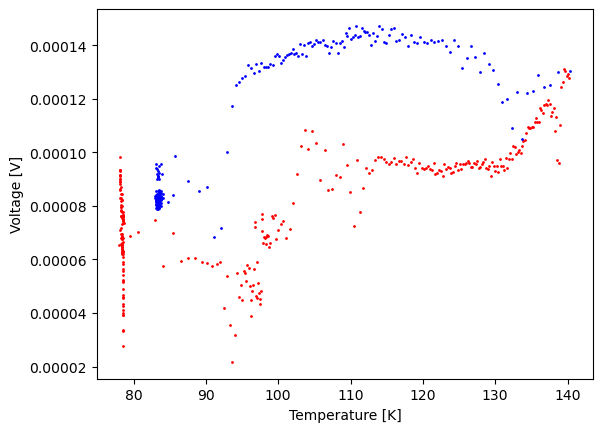

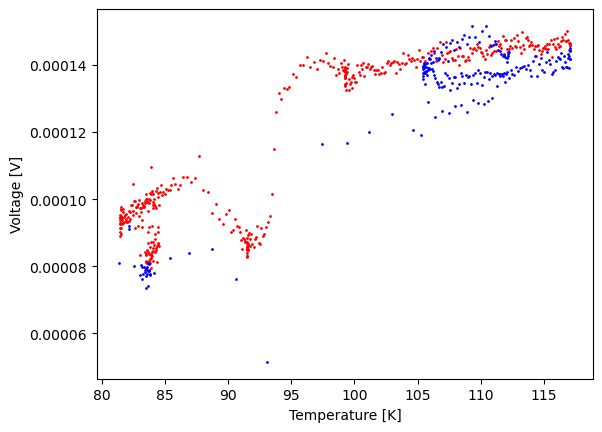

Text(0, 0.5, 'Voltage [V]')

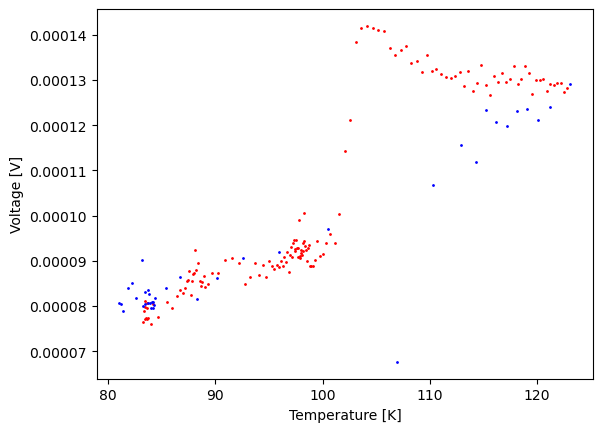

In [164]:
#plot the two curves measured by V+ against the temperature for the one without magnetic field
#red denotes heating and blue cooling
plt.scatter(heating_data_01[:,5], heating_data_01[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_01[:,5], cooling_data_01[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()

plt.scatter(heating_data_02[:,5], heating_data_02[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_02[:,5], cooling_data_02[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()
#create that plot for all the measurements
plt.scatter(heating_data_03[:,5], heating_data_03[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_03[:,5], cooling_data_03[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')


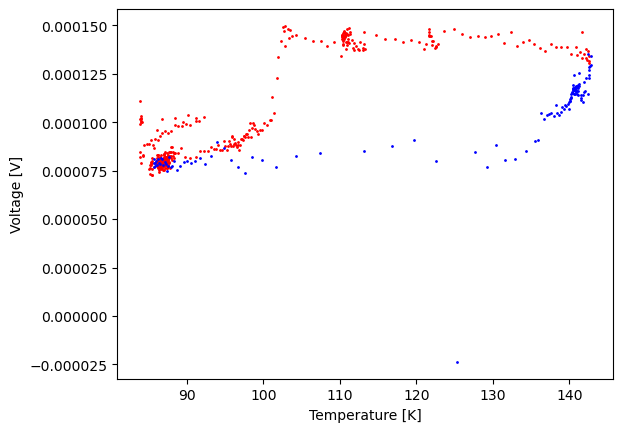

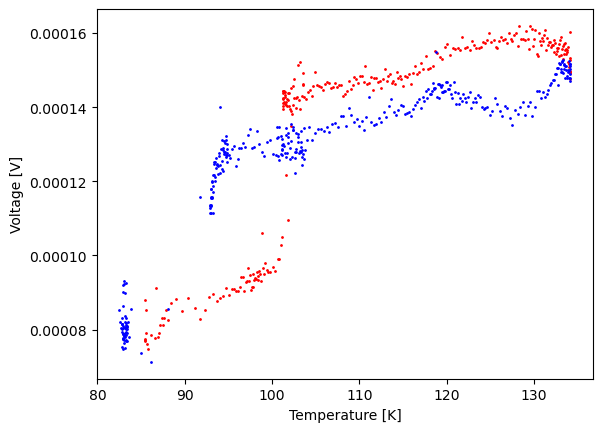

In [163]:
#same for measurement 3 and 4 with the magnetic field
plt.scatter(heating_data_04[:,5], heating_data_04[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_04[:,5], cooling_data_04[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()

plt.scatter(heating_data_05[:,5], heating_data_05[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_05[:,5], cooling_data_05[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()


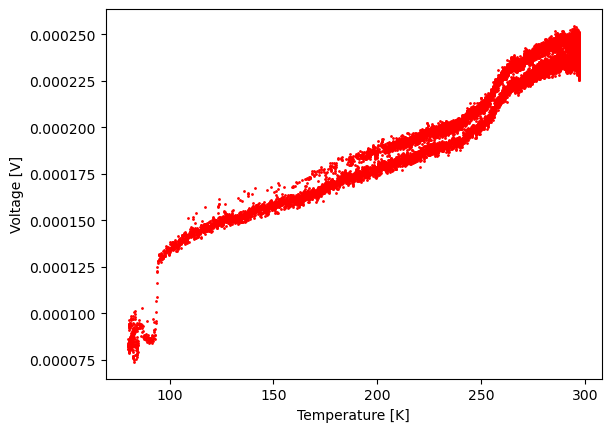

In [158]:
#plot for the overnight measurement
plt.scatter(heating_data_06[:,5], heating_data_06[:,2], s = 1, color = 'red')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()


# From this data it is visible that the critical temperature shifts to around 90 to 100 K
- to get more beautiful results we will bin the data for the V+ and the V-
- I guess shifting the data and using its difference as an uncertainty is not a good idea or how will we determine 
what the correct shift is ? 
- maybe it is better to caluclate on both the binned data V+ and V- the critical temperature and then take the average
 of both

# V- values printed

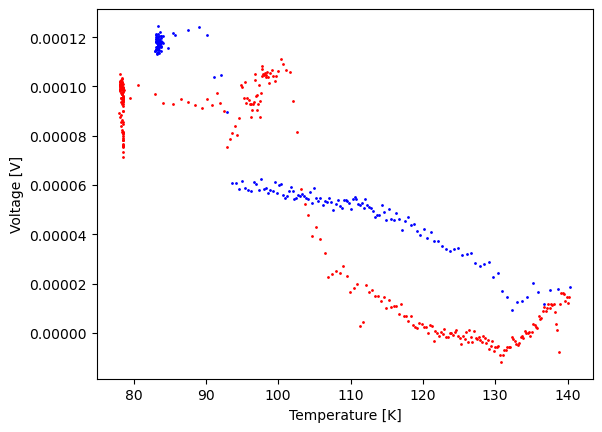

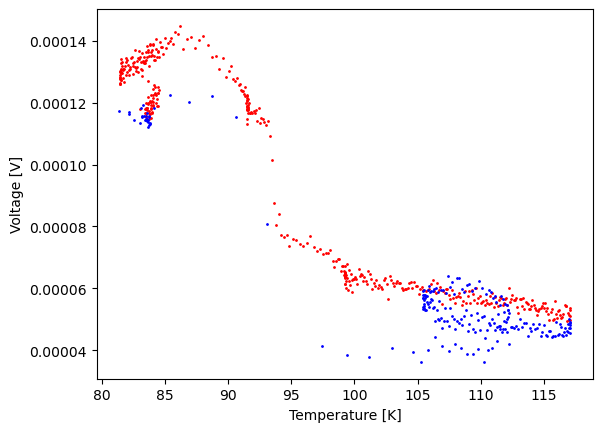

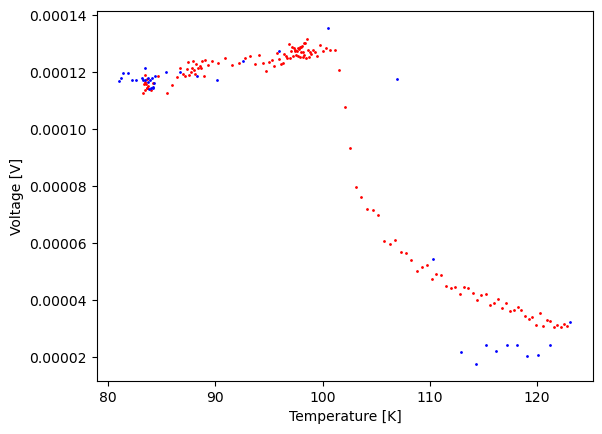

In [166]:
#plot the three curves measured by V- against the temperature for the one without magnetic field
plt.scatter(heating_data_01[:,5], heating_data_01[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_01[:,5], cooling_data_01[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()

plt.scatter(heating_data_02[:,5], heating_data_02[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_02[:,5], cooling_data_02[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()

#create that plot for all the measurement
plt.scatter(heating_data_03[:,5], heating_data_03[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_03[:,5], cooling_data_03[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()


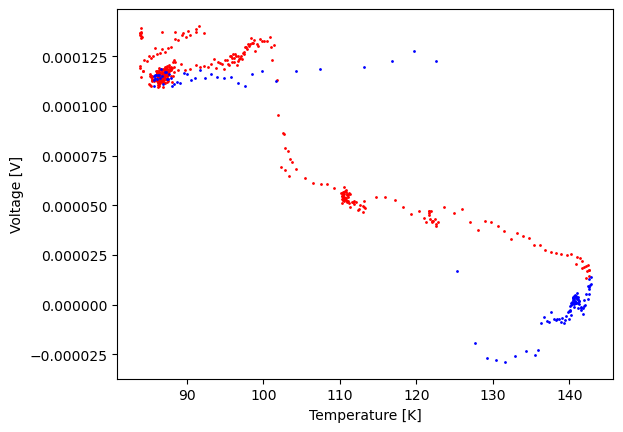

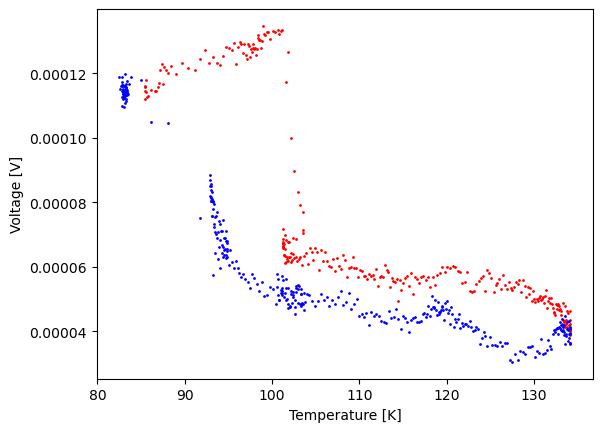

In [167]:
#same for measurement 4 and 5 with the magnetic field
plt.scatter(heating_data_04[:,5], heating_data_04[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_04[:,5], cooling_data_04[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()
    
plt.scatter(heating_data_05[:,5], heating_data_05[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_05[:,5], cooling_data_05[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()


# Weiteres vorgehen 
- Ziel ist es die Kritische temperatur mit und ohne Magnetfeld zu bestimmen
- DAfür bestimmen wir die Kritische Temperatur auf gebinnten daten 
- Die Temperatur sollte auch aus dem Mittelwert von Tbefore und Tafter bestimmt werden
- dann fitten wir zu den beiden Kurven eine Funktion und bestimmen die Kritische Temperatur als der Ort mit dem 
steilsten gradienten.